In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

3500


<Figure size 640x480 with 0 Axes>

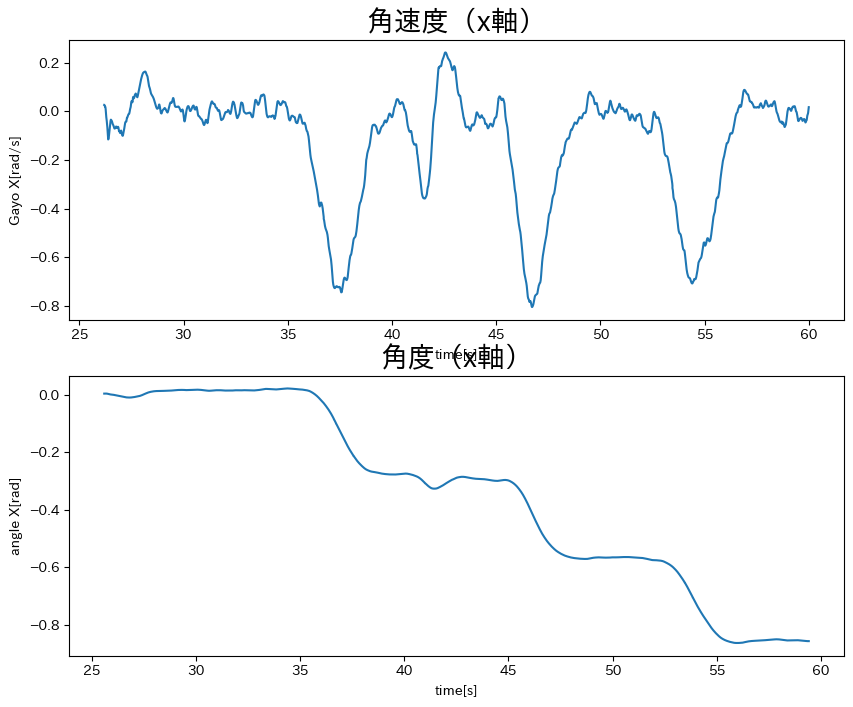

In [19]:
# csvファイルの読み込み

csv_Gyroscope = "data/03/gyroscope.csv"


raw_Gyroscope = pd.read_csv(csv_Gyroscope)


print(len(raw_Gyroscope))

window_acc = 400
window_pre = 240
window_gayo = 120
shift_amount = window_pre * -1

# 生データの描画
# df_pre = pd.read_csv(csv_Pressure)
df_gyro = pd.read_csv(csv_Gyroscope)


df_gyro["norm"] = (df_gyro["x"] ** 2 + df_gyro["y"] ** 2 + df_gyro["z"] ** 2) ** (1 / 2)

df_gyro["angle"] = np.cumsum(df_gyro["x"]) / 500


df_gyro["low_x"] = df_gyro["x"].rolling(window=window_gayo).mean()
df_gyro["angle_x"] = df_gyro["angle"].rolling(window=window_gayo, center=True).mean()

plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 8))

# 角速度（x軸）のプロット
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df_gyro["t"], df_gyro["low_x"])
ax1.set_title("角速度（x軸）", fontsize=20)
ax1.set_xlabel("time[s]")
ax1.set_ylabel("Gayo X[rad/s]")

# 角度（x軸）のプロット
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(df_gyro["t"], df_gyro["angle_x"])
ax2.set_title("角度（x軸）", fontsize=20)
ax2.set_xlabel("time[s]")
ax2.set_ylabel("angle X[rad]")

plt.show()